文本数据分析的作用：
- 帮助我们理解数据语料。


常用的文本数据分析方法：
- 标签数量分布，label的分布
- 句子长度分布
- 词频统计与关键词词云

通过绘制句子长度分布图，可得知语料中大部分句子长度的分布范围。因为模型的输入要求固定尺寸的张量，合理的长度范围对之后进行句子截断补齐起到关键的指导作用。

In [5]:
import seaborn as sns
import pandas as pd 
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')

In [32]:
# neg_data = pd.read_csv('./data/中文酒店评论数据/neg.txt', header=None, sep='   ')
# pos_data = pd.read_csv('./data/中文酒店评论数据/pos.txt', header=None, sep='   ')
# neg_data.columns = ['label', 'sentence']
# pos_data.columns = ['label', 'sentence']

# train_data = neg_data.iloc[:int(neg_data.shape[0] * 0.75)].append(pos_data.iloc[:int(pos_data.shape[0] * 0.75)])
# valid_data = neg_data.iloc[int(neg_data.shape[0] * 0.75):].append(pos_data.iloc[int(pos_data.shape[0] * 0.75):])
# train_data.shape, valid_data.shape

In [33]:
train_data = pd.read_csv('./data/cn_data/train.tsv', sep='\t')
valid_data = pd.read_csv('./data/cn_data/dev.tsv', sep='\t')

E:\Program Files (x86)\miniconda\envs\torch\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


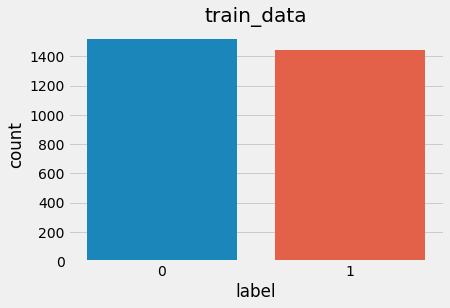

In [34]:
# 训练集标签数量分布
sns.countplot('label', data=train_data)
plt.title('train_data')
plt.show()

E:\Program Files (x86)\miniconda\envs\torch\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


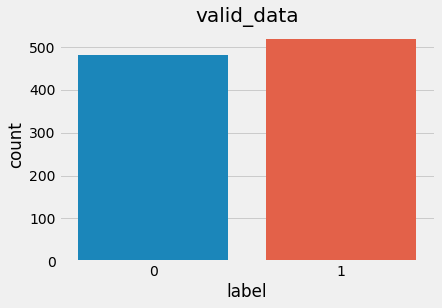

In [35]:
sns.countplot('label', data=valid_data)
plt.title('valid_data')
plt.show()

In [36]:
train_data['sentence_length'] = train_data.sentence.apply(len)

E:\Program Files (x86)\miniconda\envs\torch\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


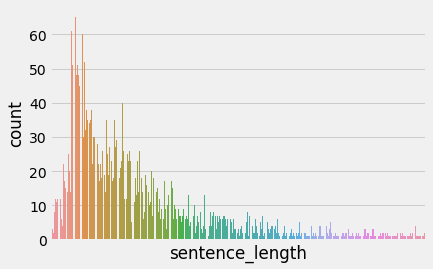

In [37]:
# 绘制句子长度列的数量分布图
sns.countplot('sentence_length', data=train_data)
# 关注count长度的纵坐标分布
plt.xticks([])
plt.show()

E:\Program Files (x86)\miniconda\envs\torch\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


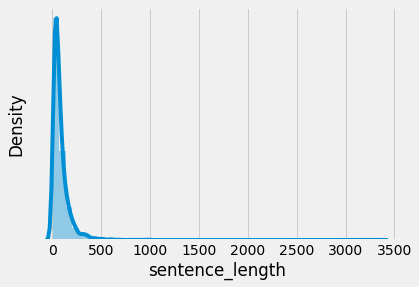

In [38]:
sns.distplot(train_data['sentence_length'])
# 关注count长度的横坐标分布
plt.yticks([])
plt.show()

In [39]:
valid_data['sentence_length'] = valid_data.sentence.apply(len)

E:\Program Files (x86)\miniconda\envs\torch\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


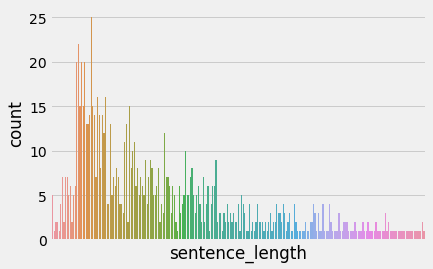

In [43]:
sns.countplot('sentence_length', data=valid_data)
plt.xticks([])
plt.show()

E:\Program Files (x86)\miniconda\envs\torch\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


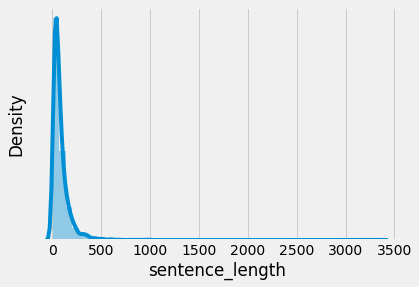

In [41]:
sns.distplot(train_data['sentence_length'])
plt.yticks([])
plt.show()

通过散点图，可有效定位异常点的出现位置，帮助我们更准确进行人工语料审查。

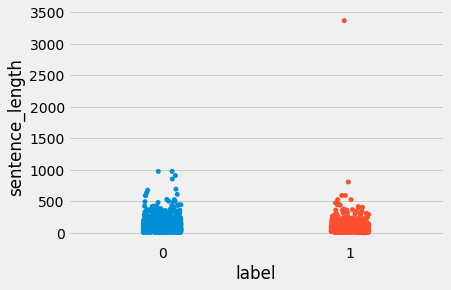

In [45]:
# 训练集长度分布的散点图
sns.stripplot(y='sentence_length', x='label', data=train_data)
plt.show()

In [46]:
import jieba
from itertools import chain
# chain用于分词扁平化列表

In [47]:
# 获得不同词汇总数统计
train_vocab = set(chain(*map(lambda x: jieba.lcut(x), train_data['sentence'])))
print(len(train_vocab))

valid_vocab = set(chain(*map(lambda x: jieba.lcut(x), valid_data['sentence'])))
print(len(valid_vocab))

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\Administrator\AppData\Local\Temp\jieba.cache
Loading model cost 0.473 seconds.
Prefix dict has been built successfully.


12162
6857


In [51]:
# 获得训练集上正负样本高频形容词词云
import jieba.posseg as pseg
from wordcloud import WordCloud

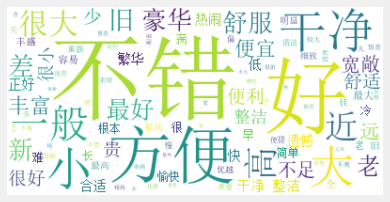

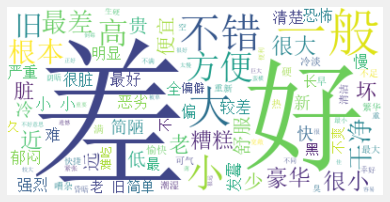

In [71]:
def get_a_list(text):
    # 词性属性flag
    r = []
    for g in pseg.lcut(text):
        if g.flag == 'a':
            r.append(g.word)
    return r

def get_word_cloud(keywords_list):
    # max_words：指定词云图像最多可以显示的词汇数量
    wordcloud = WordCloud(font_path='.\data\simsun.ttc', max_words=100, background_color='white')
    # 将传入的列表参数转化为字符串形式
    keywords_string = ' '.join(keywords_list)
    wordcloud.generate(keywords_string)
    
    plt.figure()
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()
    
p_train_data = train_data[train_data.label == 1]['sentence']
train_p_a_vocab = chain(*map(lambda x: get_a_list(x), p_train_data))

n_train_data = train_data[train_data.label == 0]['sentence']
train_n_a_vocab = chain(*map(lambda x: get_a_list(x), n_train_data))

get_word_cloud(train_p_a_vocab)
get_word_cloud(train_n_a_vocab)

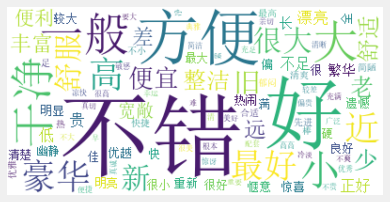

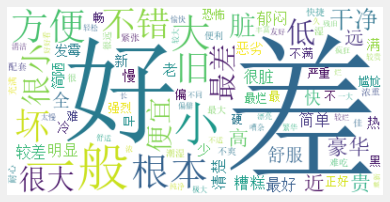

In [74]:
p_valid_data = valid_data[valid_data.label == 1]['sentence']
valid_p_a_vocab = chain(*map(lambda x: get_a_list(x), p_valid_data))

n_valid_data = valid_data[valid_data.label == 0]['sentence']
valid_n_a_vocab = chain(*map(lambda x: get_a_list(x), n_valid_data))

get_word_cloud(valid_p_a_vocab)
get_word_cloud(valid_n_a_vocab)

根据词云，对当前语料质量进行简单评估。对违反语料标签含义的词汇进行人工审查和修正。

In [ ]:
62

In [13]:
pd.read_csv?